<a href="https://colab.research.google.com/github/Alexgs9/Proyecto-final-Sem-Bas-En-Con/blob/main/MLP_proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Alexgs9/Proyecto-final-Sem-Bas-En-Con/main/heart.csv"  # heart
dataset = pd.read_csv(url)

In [33]:
def convertir_a_numericos(dataset):
    # Crea una copia del conjunto de datos para evitar modificar el original
    dataset_copia = dataset.copy()

    # Itera sobre todas las columnas del conjunto de datos
    for columna in dataset_copia.columns:
        # Verifica si el tipo de datos de la columna es objeto (cadena u otro tipo no numérico)
        if dataset_copia[columna].dtype == 'object':
            # Utiliza LabelEncoder para convertir las etiquetas de texto a valores numéricos
            label_encoder = LabelEncoder()
            dataset_copia[columna] = label_encoder.fit_transform(dataset_copia[columna])

    return dataset_copia

In [34]:
def dividir(X, y, test_size=0.2, random_state=42):
    # Divide el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [35]:
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

def derivada(x):
    return x * (1 - x)

def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

In [36]:
def inicializar_pesos(input_size, hidden_layer_size, output_size):
    np.random.seed(42)
    weights = {
        'W1': np.random.rand(input_size, hidden_layer_size),
        'b1': np.zeros((1, hidden_layer_size)),
        'W2': np.random.rand(hidden_layer_size, output_size),
        'b2': np.zeros((1, output_size))
    }
    return weights

def predecir(X, weights):
    layer1_output = sigmoide(np.dot(X, weights['W1']) + weights['b1'])
    output = sigmoide(np.dot(layer1_output, weights['W2']) + weights['b2'])
    return np.round(output).astype(int)

def entrenar(X, y, epochs=10000, learning_rate=0.1):
    input_size = X.shape[1]
    hidden_layer_size = 2
    output_size = 1

    weights = inicializar_pesos(input_size, hidden_layer_size, output_size)

    for epoch in range(epochs):
        # Propagación hacia adelante
        layer1_output = sigmoide(np.dot(X, weights['W1']) + weights['b1'])
        output = sigmoide(np.dot(layer1_output, weights['W2']) + weights['b2'])

        # Calcular la pérdida
        loss = binary_cross_entropy_loss(y, output)

        # Retropropagación
        output_error = y - output
        output_delta = output_error * derivada(output)

        layer1_error = output_delta.dot(weights['W2'].T)
        layer1_delta = layer1_error * derivada(layer1_output)

        # Actualizar pesos y sesgos utilizando descenso de gradiente
        weights['W2'] += layer1_output.T.dot(output_delta) * learning_rate
        weights['b2'] += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        weights['W1'] += X.T.dot(layer1_delta) * learning_rate
        weights['b1'] += np.sum(layer1_delta, axis=0, keepdims=True) * learning_rate

        if epoch % 1000 == 0:
            print(f'Época {epoch}, Pérdida: {loss}')

    return weights

In [37]:
# Preprocesamiento de los datos

# Convertir a numericos
dataset = convertir_a_numericos(dataset);

# Dividir en atributos y clase
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values.reshape(-1, 1)

# Dividir en entrenamiento y pruebas
X_train, X_test, Y_train, Y_test = dividir(X,Y);

In [38]:
# Obtencion de los pesos del entrenamiento
pesos = entrenar(X_train, Y_train)

# Calcular predicciones
predicciones = predecir(X_test, pesos)

# Calcular la precisión en las pruebas
accuracy_test = np.sum(predicciones == Y_test) / len(Y_test)
print(f'Precisión para MLP en el conjunto de prueba {accuracy_test}')

# Calcular el informe de clasificación que incluye precisión, recall, etc
informe = classification_report(Y_test, predicciones, zero_division=1)
# Imprimir el informe de clasificación
print("\nInforme:")
print(informe)

Época 0, Pérdida: 0.7201462442458674
Época 1000, Pérdida: 0.6984506106905676
Época 2000, Pérdida: 0.6992563131571352
Época 3000, Pérdida: 0.7790610913133168
Época 4000, Pérdida: 0.7442580881717266
Época 5000, Pérdida: 0.6960260888950851
Época 6000, Pérdida: 0.7702316205277367
Época 7000, Pérdida: 0.698350574532332
Época 8000, Pérdida: 0.7625497843286254
Época 9000, Pérdida: 0.7028407269020106
Precisión para MLP en el conjunto de prueba 0.5245901639344263

Informe:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        29
           1       0.52      1.00      0.69        32

    accuracy                           0.52        61
   macro avg       0.76      0.50      0.34        61
weighted avg       0.75      0.52      0.36        61



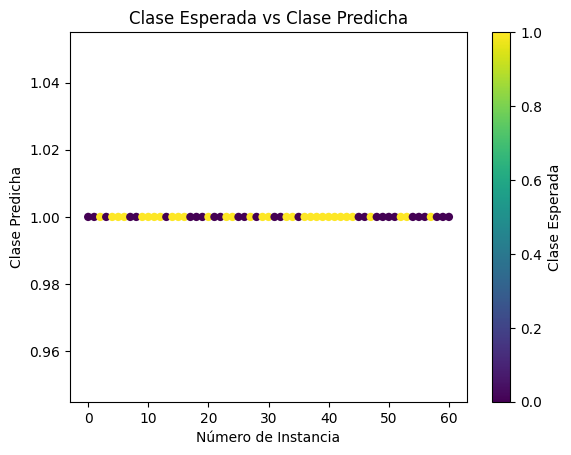

In [40]:
# Gráfico de la clase esperada vs la clase predicha
plt.scatter(range(len(Y_test)), predicciones, c=Y_test, cmap='viridis', edgecolors='none')
plt.xlabel('Número de Instancia')
plt.ylabel('Clase Predicha')
plt.title('Clase Esperada vs Clase Predicha')
plt.colorbar(label='Clase Esperada')
plt.show()